**REVENUE PREDICTION**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
shop = pd.read_csv("/content/revenue_prediction_dataset.csv")
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4.0,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4.0,Returning_Visitor,True,False


In [ ]:
shop.shape

(12330, 18)

##Data Cleaning

In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12253 non-null  float64
 1   Administrative_Duration  12253 non-null  float64
 2   Informational            12279 non-null  float64
 3   Informational_Duration   12279 non-null  float64
 4   ProductRelated           12241 non-null  float64
 5   ProductRelated_Duration  12241 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12245 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12272 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
shop.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

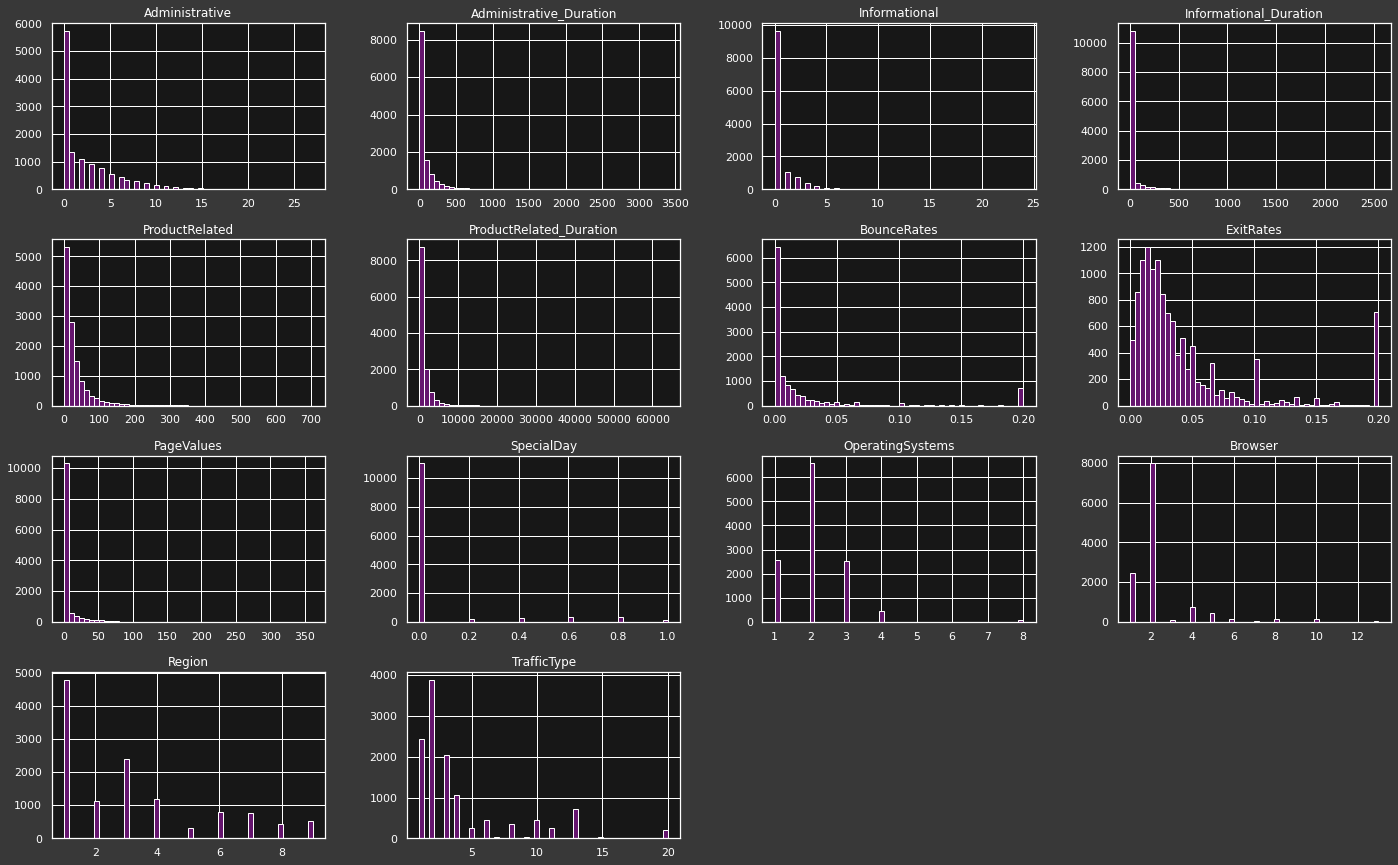

In [ ]:
# Plot the distribution of all numerical columns of the dataframe.
shop.hist(bins=50, figsize=(24, 15), color=sns.color_palette("inferno")[1]);
plt.title("Histograms showing frequency distribution of values of each numerical column");

**INSIGHTS:**

1) Administrative, Informational and ProductRelated columns should be imputed with the mode value. As the distribution is clearly skewed with one dominant entry.

2) Rest of the numerical columns also form a skewed distribution. But the values are continuous instead of being discrete. Median could have been used for imputation but we have chosen KNN Imputation for better results.

In [ ]:
# Fill the Administrative, Informational and Product related with mode values
# Mode value is used because the values in these columns are discrete integer values. Filling by the mean would introduce unnecessary float values.
# Median was not used because most of the values in these columns are the same.
shop["Administrative"].replace(np.nan, shop["Administrative"].mode().iloc[0], inplace=True)
shop["Informational"].replace(np.nan, shop["Informational"].mode().iloc[0], inplace=True)
shop["ProductRelated"].replace(np.nan, shop["ProductRelated"].mode().iloc[0], inplace=True)

In [ ]:
# Null values for above mentioned 3 columns have been removed.
shop.isnull().sum()

Administrative              0
Administrative_Duration    77
Informational               0
Informational_Duration     51
ProductRelated              0
ProductRelated_Duration    89
BounceRates                 0
ExitRates                   0
PageValues                  0
SpecialDay                 85
Month                       0
OperatingSystems           58
Browser                     0
Region                      0
TrafficType                95
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [ ]:
# Administrative column was getting converted to object. Reconverting to numeric to avoid errors.
pd.to_numeric(shop["Administrative"], errors="ignore")

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12325    3.0
12326    0.0
12327    0.0
12328    4.0
12329    0.0
Name: Administrative, Length: 12330, dtype: float64

In [ ]:
# Use KNN-Imputer to impute rest of the numerical columns containing null values
columns_impute = [
    "Administrative_Duration",
    "Informational_Duration",
    "ProductRelated_Duration",
    "SpecialDay",
    "OperatingSystems",
    "TrafficType",
]
# Reset the dataframe as a safety measure.
shop.reset_index(drop=True, inplace=True)
# KNNImputed with 5 nearest neighbors
imputer = KNNImputer(n_neighbors=5)
shop_imputed = pd.DataFrame(
    imputer.fit_transform(shop.loc[:, columns_impute]),  # Filtering the columns mentioned in the columns_impute list
    index=range(shop.shape[0]),  # Index is the same as the original dataframe
    columns=columns_impute,
)
shop.loc[:, columns_impute] = shop_imputed  # Merging the imputed columns back into the main dataframe.

In [ ]:
# We can see that all null values have been removed.
shop.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [ ]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

##Basic Exploration

In [ ]:
# List the numeric and boolean columns of the dataframe.
shop_numeric_columns = [
    "Administrative",
    "Administrative_Duration",
    "Informational",
    "Informational_Duration",
    "ProductRelated",
    "ProductRelated_Duration",
    "BounceRates",
    "ExitRates",
    "PageValues",
    "SpecialDay",
    "OperatingSystems",
    "Browser",
    "Region",
    "TrafficType",
    "Weekend",
    "Revenue",
]

In [ ]:
# Describe the dataframe
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.302676,80.795297,0.502676,34.518185,31.467883,1191.547987,0.022191,0.043073,5.889258,0.061298,2.124509,2.357097,3.147364,4.062985
std,3.319160,176.414462,1.269648,140.763818,44.380301,1908.712461,0.048488,0.048597,18.568437,0.198292,0.910368,1.717277,2.401591,4.009558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.287500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.357143,0.000000,0.000000,18.000000,600.661667,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,37.000000,1458.966190,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
# Pearson correlation calculated between all pairs of numeric columns of the dataframe.
shop.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.600066,0.373736,0.255945,0.428528,0.372665,-0.222506,-0.314945,0.099286,-0.094035,-0.005596,-0.025496,-0.005260,-0.032997,0.027758,0.138745
Administrative_Duration,0.600066,1.000000,0.302587,0.239257,0.286995,0.353560,-0.143874,-0.205363,0.067904,-0.073754,-0.007184,-0.014972,-0.005029,-0.014714,0.015745,0.093405
Informational,0.373736,0.302587,1.000000,0.618454,0.371281,0.386684,-0.115840,-0.163264,0.047953,-0.048056,-0.009495,-0.038104,-0.029536,-0.034000,0.035732,0.095186
Informational_Duration,0.255945,0.239257,0.618454,1.000000,0.279960,0.347555,-0.074095,-0.105368,0.030584,-0.030428,-0.009663,-0.019417,-0.027597,-0.024040,0.024268,0.070095
ProductRelated,0.428528,0.286995,0.371281,0.279960,1.000000,0.859708,-0.203211,-0.290960,0.057081,-0.024605,0.004300,-0.013264,-0.036475,-0.040979,0.016680,0.155209
ProductRelated_Duration,0.372665,0.353560,0.386684,0.347555,0.859708,1.000000,-0.184435,-0.251883,0.053297,-0.036640,0.002096,-0.008266,-0.032824,-0.034681,0.008087,0.150294
BounceRates,-0.222506,-0.143874,-0.115840,-0.074095,-0.203211,-0.184435,1.000000,0.913004,-0.119386,0.072200,0.025636,-0.015772,-0.006485,0.075800,-0.046514,-0.150673
ExitRates,-0.314945,-0.205363,-0.163264,-0.105368,-0.290960,-0.251883,0.913004,1.000000,-0.174498,0.101458,0.016369,-0.004442,-0.008907,0.076307,-0.062587,-0.207071
PageValues,0.099286,0.067904,0.047953,0.030584,0.057081,0.053297,-0.119386,-0.174498,1.000000,-0.063172,0.018327,0.045592,0.011315,0.012749,0.012002,0.492569
SpecialDay,-0.094035,-0.073754,-0.048056,-0.030428,-0.024605,-0.036640,0.072200,0.101458,-0.063172,1.000000,0.010719,0.003465,-0.014835,0.050216,-0.016498,-0.081560


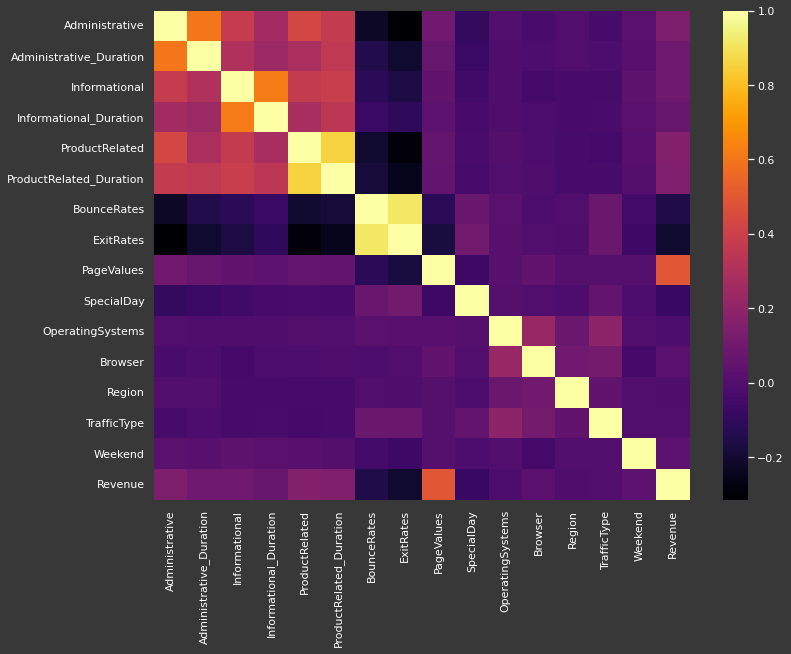

In [ ]:
# Heatmap to recognise potential correlation trends.
sns.heatmap(data=shop.corr(), cmap="inferno", annot=False);

**INSIGHTS:**

1) It is visible that the columns which relate to the time based interaction of users with the website are highly correlated within themselves, but show weaker correlation with revenue. This implies that revenue is dependent on a variety of factors instead of simply being related with the number of pages visited.

2) It is visible that the bounce rates and exit rates of the website show high positive correlation with each other, while showing a negative correlation with page related variables. This is expected as exit rates and bounce rates go down with number of pages being visited.

3) Page values show a high positive correlation with revenue. This is expected as customers visiting higher valued pages tend to generate higher revenues.

4) The values of region, browser and operating system do not seem to be affecting the revenue in any significant manner. Which is intuitively understandable.

In [ ]:
# Number of unique values in each column of the dataframe.
shop.nunique()

Administrative               27
Administrative_Duration    3370
Informational                17
Informational_Duration     1269
ProductRelated              310
ProductRelated_Duration    9549
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                   14
Month                        10
OperatingSystems             17
Browser                      13
Region                        9
TrafficType                  41
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

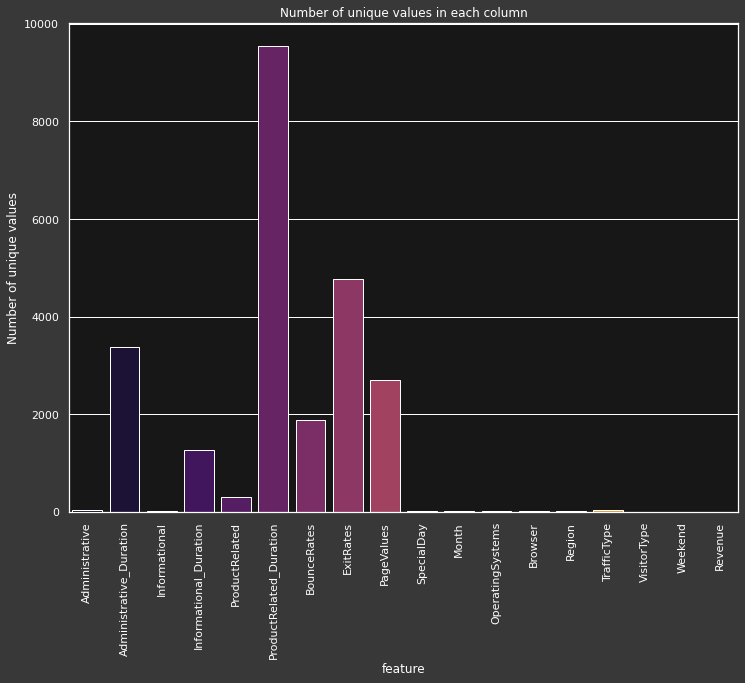

In [ ]:
# Plot the number of unique values in each column for visual interpretation.
nu = shop.nunique().reset_index()  # reset_index() converts pandas series to dataframe
nu.columns = ['feature','nunique']
ax = sns.barplot(x='feature', y='nunique', data=nu, palette="inferno")
plt.xticks(rotation=90);
plt.ylabel("Number of unique values");
plt.title("Number of unique values in each column");

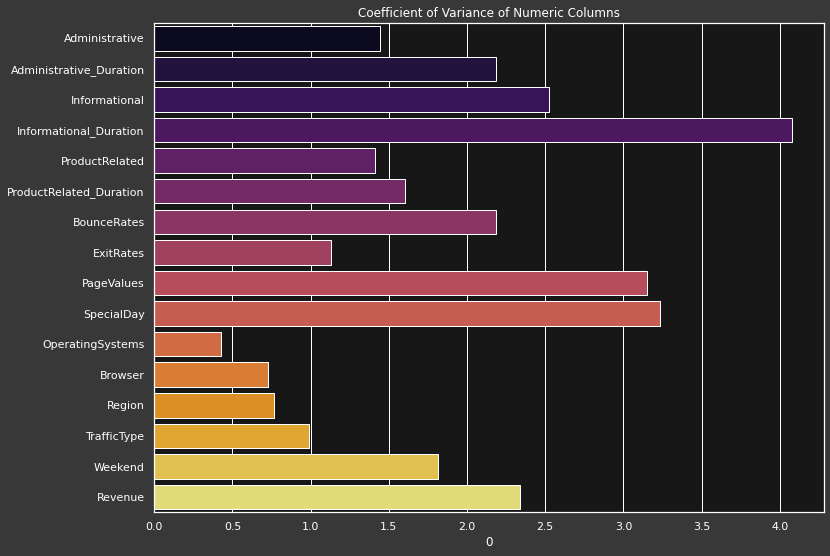

In [ ]:
shop_coeff_var = pd.DataFrame(shop.loc[:, shop_numeric_columns].std() / shop.loc[:, shop_numeric_columns].mean())
sns.barplot(data=shop_coeff_var, x=0, y=shop.loc[:, shop_numeric_columns].columns.values, orient="horizontal", palette="inferno");
plt.title("Coefficient of Variance of Numeric Columns");

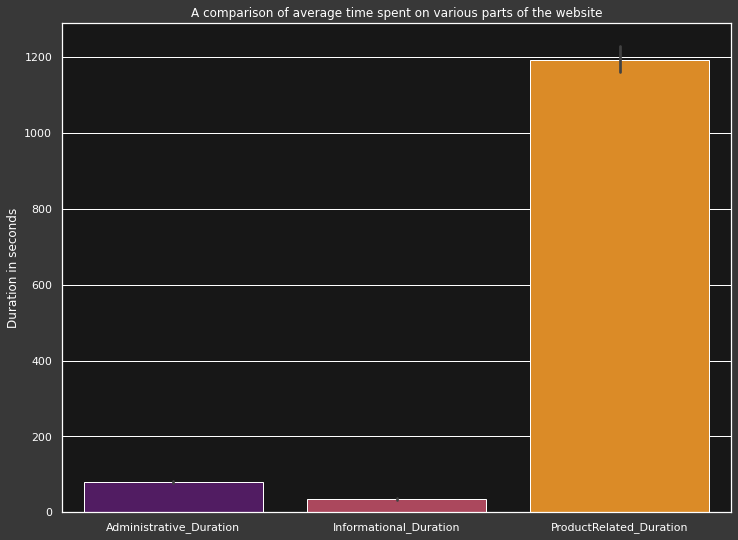

In [ ]:
durations = [
    "Administrative_Duration",
    "Informational_Duration",
    "ProductRelated_Duration",
]
sns.barplot(data=shop.loc[:, durations], palette="inferno");  # Bar plot to compare time spent on various parts of the website.
plt.ylabel("Duration in seconds");
plt.title("A comparison of average time spent on various parts of the website");

**INSIGHTS:**

1) The number of unique values in Product Related duration is high but coefficient of variance is low. This means that time spent by people on product related pages falls in a specific band. It means that a large number of people are spending an average amount of time on product related pages.

2) The number of unique values in Informational duration is low but coefficient of variance is very high. This is a good sign. As very few people are spending any significant time on pages like help and FAQs. The customers are satisfied.

3) These insights are further reinforced by the fact that average time spent on product related pages is much higher that time spent on informational pages. Which is even lower than time being spent on administrative pages. Again a testimony to customer satisfaction.

## Advanced Exploration

In [ ]:
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4.0,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4.0,Returning_Visitor,True,False


In [ ]:
# Mean of all numeric columns of the dataset.
shop_mean = shop.loc[:, shop_numeric_columns].mean().reset_index()  # reset_index converts series to dataframe
shop_mean.rename(columns={0: "mean"}, inplace=True)  # Column name was 0 make it mean
shop_mean

,index,mean
0,Administrative,2.302676
1,Administrative_Duration,80.795297
2,Informational,0.502676
3,Informational_Duration,34.518185
4,ProductRelated,31.467883
5,ProductRelated_Duration,1191.547987
6,BounceRates,0.022191
7,ExitRates,0.043073
8,PageValues,5.889258
9,SpecialDay,0.061298


In [ ]:
# Calculate the 3 quartiles for this dataframe of means
# Each of these variables-percentile_25, 50 and 75 are pandas series.
percentile_25 = shop_mean.quantile(0.25)
percentile_50 = shop_mean.quantile(0.50)
percentile_75 = shop_mean.quantile(0.75)

In [ ]:
# Divide the dataframe into 4 quartiles
shop_percentile_25 = np.array(shop_mean[shop_mean["mean"] < percentile_25.iloc[0]]["index"])
shop_percentile_25_50 = np.array(shop_mean[(shop_mean["mean"] > percentile_25.iloc[0]) & (shop_mean["mean"] < percentile_50.iloc[0])]["index"])
shop_percentile_50_75 = np.array(shop_mean[(shop_mean["mean"] > percentile_50.iloc[0]) & (shop_mean["mean"] < percentile_75.iloc[0])]["index"])
shop_percentile_75_100 = np.array(shop_mean[shop_mean["mean"] > percentile_75.iloc[0]]["index"])

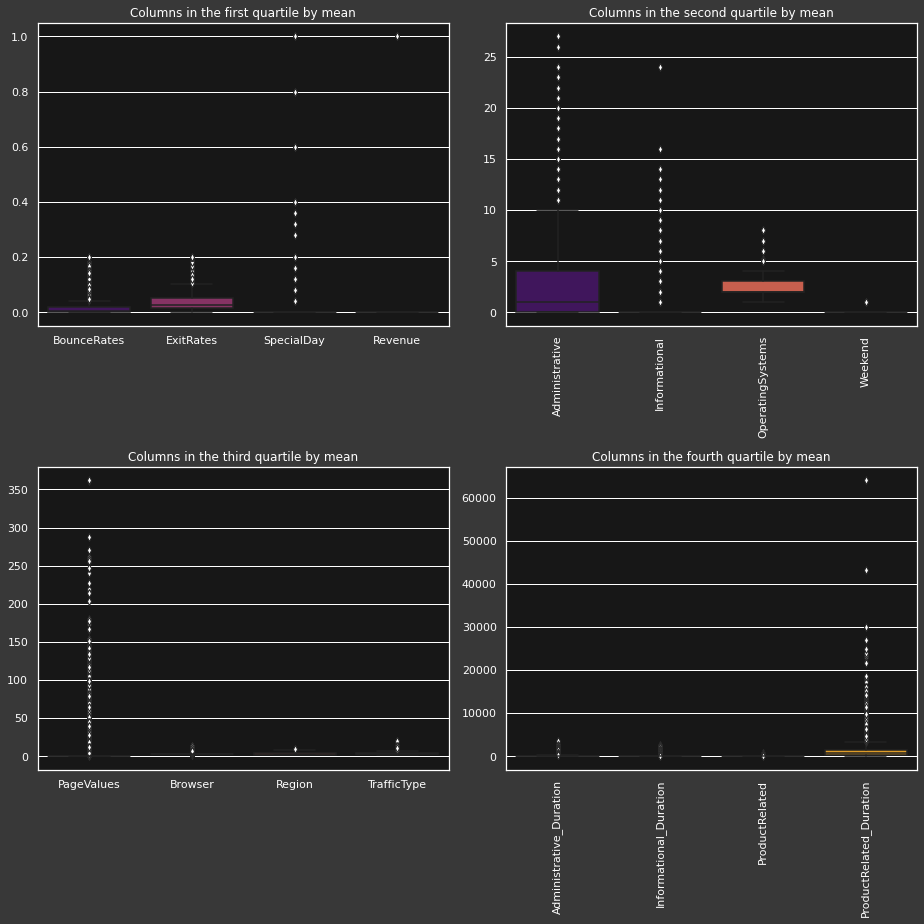

In [ ]:
# Plot box plots for the numeric columns of the dataset.
# Box plot of columns falling in each quartile are plotted together.
plot, axes = plt.subplots(2, 2, figsize=(13, 13))
sns.boxplot(ax=axes[0, 0], data=shop.loc[:, shop_percentile_25], flierprops={"markerfacecolor": "white"}, palette="inferno")
sns.boxplot(ax=axes[0, 1], data=shop.loc[:, shop_percentile_25_50], flierprops={"markerfacecolor": "white"}, palette="inferno")
sns.boxplot(ax=axes[1, 0], data=shop.loc[:, shop_percentile_50_75], flierprops={"markerfacecolor": "white"}, palette="inferno")
sns.boxplot(ax=axes[1, 1], data=shop.loc[:, shop_percentile_75_100], flierprops={"markerfacecolor": "white"}, palette="inferno")
axes[0, 1].tick_params(axis='x', rotation=90)
axes[1, 1].tick_params(axis='x', rotation=90)
axes[0, 0].set_title("Columns in the first quartile by mean")
axes[0, 1].set_title("Columns in the second quartile by mean")
axes[1, 0].set_title("Columns in the third quartile by mean")
axes[1, 1].set_title("Columns in the fourth quartile by mean")
plt.tight_layout();

**INSIGHTS:**

1) The box plot for the bounce rates and exit rates shows that many customers are satisfied with bounce and exit rates close to 0. Further there are a lot of outliers which are potential customers which the website may target.

2) We see that a few outliers are spending high amounts of time on administrative pages. These would be the executives and admins of the website. Further there is a large fraction of people who are spending moderate amount of time on the admin pages. This could mean that the website has employed beta testers.

3) Time spent on informational pages is close to zero for most users. We can see a few outliers, these would be confused or dissatisfied customers. The website owners should spend time catering to the needs of these customers. This would lead to better retention.

In [ ]:
# Before plotting the weekend and the weekday revenues, we normalize the dataframe.
# We have 5 days in a week but only 2 days in a weekend, so naturally the counts of weekdays would be higher than weekends
shop_normalized_weekday_weekend = pd.concat([shop[shop["Weekend"] == False].sample(frac=0.2), shop[shop["Weekend"] == True].sample(frac=0.5)])

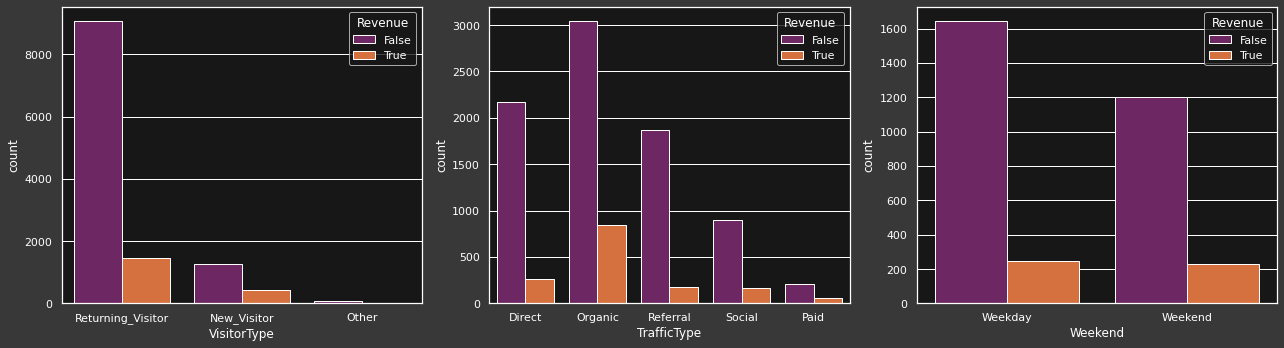

In [ ]:
plot, axes = plt.subplots(1, 3, figsize=(18, 5))
# Count plot of visitor type with focus on revenue
sns.countplot(ax=axes[0], data=shop, x="VisitorType", hue="Revenue", palette="inferno");
# Count plot to depict the 5 major kinds of traffic that land on a website, again with focus on revenue.
sns.countplot(ax=axes[1], data=shop[shop["TrafficType"].isin(range(1, 6))].sort_values(by=["TrafficType"]), x="TrafficType", hue="Revenue", palette="inferno");
# Count plot to examine sale volumes on weekdays vs weekends.
sns.countplot(ax=axes[2], data=shop_normalized_weekday_weekend, x="Weekend", hue="Revenue", palette="inferno");
axes[1].set_xticklabels([
    "Direct",
    "Organic",
    "Referral",
    "Social",
    "Paid",
])
axes[2].set_xticklabels([
    "Weekday",
    "Weekend",
])
plt.tight_layout();

**INSIGHTS:**

1) It is visible that the website has a good amount of loyal customers. These customers are also engaged with the website which is implied by low exit and bounce rates. However, the number of returning visitors who make purchases is low. The website should focus on keeping these loyal customers satisfied.

2) The website has a stable loyal customer base. At this point of time, they should direct thier efforts into expanding that customer base with focus on trying to increase the count of new customers.

3) We can see that most of the customers come to the website directly or through SEO based adverts. This is promising, the business should spend time and effort increasing the reach of their SEO based ventures.

4) It is also visible that a higher number of users make purchases on weekdays as compared to weekends. The website should introduce special weekend offers to attract customers. This would have a good impact on revenue as on weekends people tend to indulge instead of being utilitarian.

###Page Visits Related

In [ ]:
# Value counts of administrative column
shop["Administrative"].value_counts()

0.0     5804
1.0     1347
2.0     1109
3.0      909
4.0      763
5.0      571
6.0      428
7.0      336
8.0      285
9.0      222
10.0     152
11.0     105
12.0      86
13.0      56
14.0      44
15.0      38
16.0      24
17.0      16
18.0      12
19.0       6
24.0       4
22.0       4
23.0       3
21.0       2
20.0       2
27.0       1
26.0       1
Name: Administrative, dtype: int64

####Administrative

In [ ]:
# Group the dataframe by administrative values which is number of administrative pages someone visits
# Secondary group the dataset on revenue.
# Plot a line graph to examine the trends.
# Aggregate on the basis of count
admin_grouped = pd.DataFrame(shop.groupby(["Administrative", "Revenue"]).agg("count"))
# We have taken only the first 20 rows because further rows contain negligible values.
admin_grouped = pd.DataFrame(admin_grouped["Weekend"].iloc[:20])  # Any column could have been used in place of weekend, all of them contain aggregated counts.
admin_grouped

Weekend
Administrative Revenue         
0.0            False       5282
               True         522
1.0            False       1060
               True         287
2.0            False        904
               True         205
3.0            False        736
               True         173
4.0            False        611
               True         152
5.0            False        453
               True         118
6.0            False        317
               True         111
7.0            False        270
               True          66
8.0            False        213
               True          72
9.0            False        162
               True          60

In [ ]:
# X and Y variables for the line chart.
x_true_admin = range(0, 10)
y_true_admin = admin_grouped[1::2]
x_false_admin = range(0, 10)
y_false_admin = admin_grouped[::2]

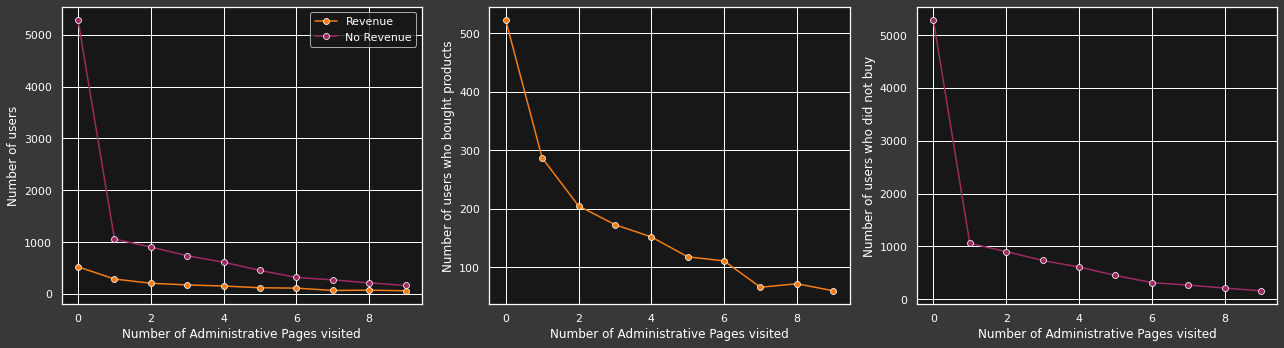

In [ ]:
# Plot line charts for revenue values true and false
plot, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.lineplot(ax=axes[0], x=x_true_admin, y=y_true_admin["Weekend"], color=sns.color_palette("inferno")[4], marker="o")  # Any column instead of weekend would do.
sns.lineplot(ax=axes[0], x=x_false_admin, y=y_false_admin["Weekend"], color=sns.color_palette("inferno")[2], marker="o")
sns.lineplot(ax=axes[1], x=x_true_admin, y=y_true_admin["Weekend"], color=sns.color_palette("inferno")[4], marker="o")
sns.lineplot(ax=axes[2], x=x_false_admin, y=y_false_admin["Weekend"], color=sns.color_palette("inferno")[2], marker="o")
axes[0].set_xlabel("Number of Administrative Pages visited")
axes[0].set_ylabel("Number of users")
axes[0].legend(["Revenue", "No Revenue"])
axes[1].set_xlabel("Number of Administrative Pages visited")
axes[1].set_ylabel("Number of users who bought products")
axes[2].set_xlabel("Number of Administrative Pages visited")
axes[2].set_ylabel("Number of users who did not buy")
plt.tight_layout();

**INSIGHTS:**

1) It is quite intuitive to understand that people who are visiting a higher number of administrative pages are either beta testers or admins and thus they are not contributing to revenue.

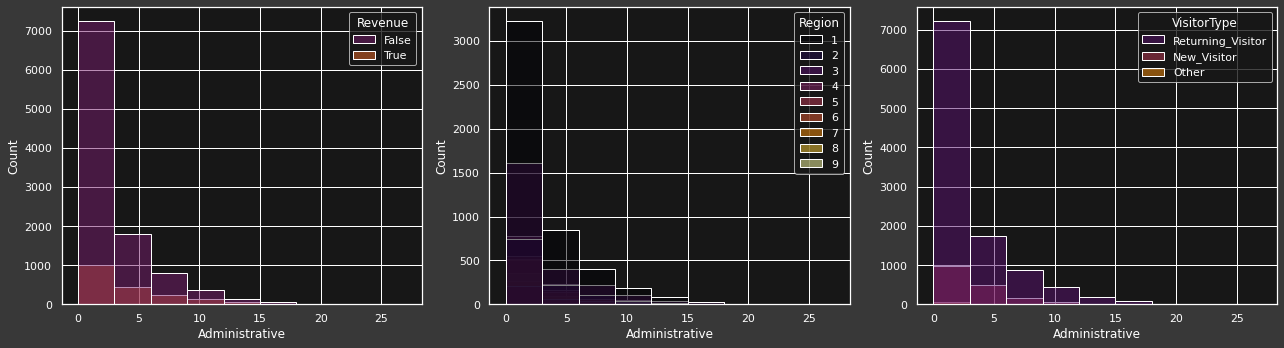

In [ ]:
# Plot histograms with focus on revenue, month and visitor type
plot, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(ax=axes[0], data=shop, x="Administrative", hue="Revenue", binwidth=3, palette="inferno");
sns.histplot(ax=axes[1], data=shop, x="Administrative", hue="Region", binwidth=3, palette="inferno");
sns.histplot(ax=axes[2], data=shop, x="Administrative", hue="VisitorType", binwidth=3, palette="inferno");
plt.tight_layout()

**INSIGHTS:**

1) The previously uncovered trends are confirmed by these stacked distributions. That poeple who visit less admin pages buy more articles. And most of the users are returning visitors.

2) We can also see that the admins of the website and the beta testers are located in a very narrow region. The website should try and expand to other regions.

In [ ]:
# Value counts of Informational Column
shop["Informational"].value_counts()

0.0     9704
1.0     1040
2.0      726
3.0      378
4.0      222
5.0       99
6.0       78
7.0       36
9.0       15
8.0       14
10.0       7
12.0       5
14.0       2
16.0       1
11.0       1
24.0       1
13.0       1
Name: Informational, dtype: int64

####Informational

In [ ]:
# Group the dataframe on the basis of unique informational values and secondary grouping on revenue
inform_grouped = pd.DataFrame(shop.groupby(["Informational", "Revenue"]).agg("count"))
# Take first 20 values and after that values become negligible
inform_grouped = pd.DataFrame(inform_grouped["Weekend"].iloc[:20])  # Any column could be used in place of weekend column
inform_grouped

Weekend
Informational Revenue         
0.0           False       8408
              True        1296
1.0           False        804
              True         236
2.0           False        573
              True         153
3.0           False        285
              True          93
4.0           False        160
              True          62
5.0           False         68
              True          31
6.0           False         61
              True          17
7.0           False         30
              True           6
8.0           False         10
              True           4
9.0           False          9
              True           6

In [ ]:
# X and Y values for line chart
x_true_inform = range(1, 11)
y_true_inform = inform_grouped[1::2]
x_false_inform = range(1, 11)
y_false_inform = inform_grouped[::2]

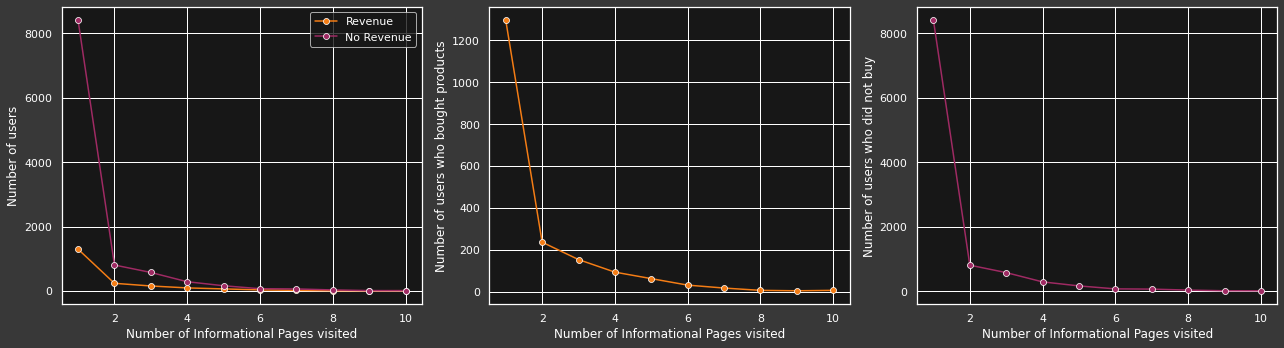

In [ ]:
# Plot the trends for revenue
plot, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.lineplot(ax=axes[0], x=x_true_inform, y=y_true_inform["Weekend"], color=sns.color_palette("inferno")[4], marker="o")  # Any column instead of weekend would do.
sns.lineplot(ax=axes[0], x=x_false_inform, y=y_false_inform["Weekend"], color=sns.color_palette("inferno")[2], marker="o")
sns.lineplot(ax=axes[1], x=x_true_inform, y=y_true_inform["Weekend"], color=sns.color_palette("inferno")[4], marker="o")
sns.lineplot(ax=axes[2], x=x_false_inform, y=y_false_inform["Weekend"], color=sns.color_palette("inferno")[2], marker="o")
axes[0].set_xlabel("Number of Informational Pages visited")
axes[0].set_ylabel("Number of users")
axes[0].legend(["Revenue", "No Revenue"])
axes[1].set_xlabel("Number of Informational Pages visited")
axes[1].set_ylabel("Number of users who bought products")
axes[2].set_xlabel("Number of Informational Pages visited")
axes[2].set_ylabel("Number of users who did not buy")
plt.tight_layout();

**INSIGHTS:**

1) It can be clearly seen that people visiting a higher number of informational pages generate significantly less revenue. This could mean that the cusomers are not satisfied with the help and assistance being provided to them. The website should take care of this.

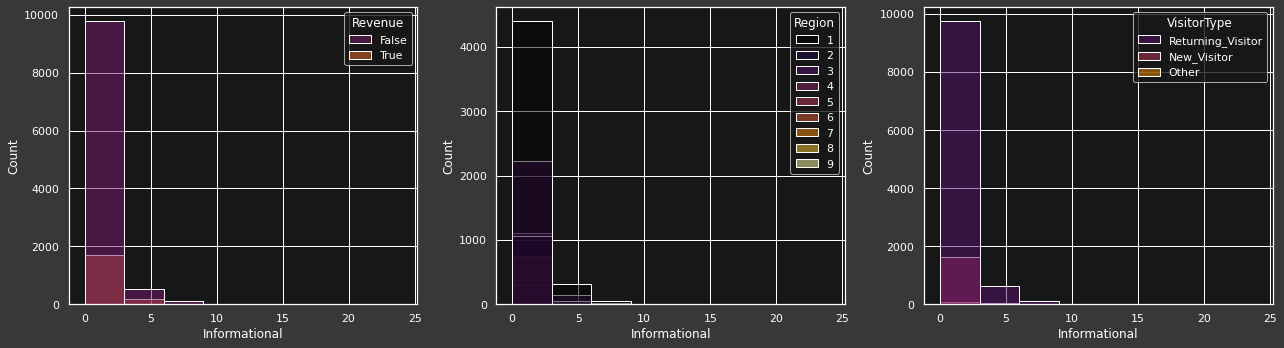

In [ ]:
plot, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(ax=axes[0], data=shop, x="Informational", hue="Revenue", binwidth=3, palette="inferno");
sns.histplot(ax=axes[1], data=shop, x="Informational", hue="Region", binwidth=3, palette="inferno");
sns.histplot(ax=axes[2], data=shop, x="Informational", hue="VisitorType", binwidth=3, palette="inferno");
plt.tight_layout()

**INSIGHTS:**

1) People who are visiting lower number of informational pages are generating more revenue. Coupled with the fact that all people visiting any significant number of informational pages are returning visitors, we can conclude that there is group of unsatisfied customers. The website should focus on these.

In [ ]:
shop["ProductRelated"].value_counts()

1.0      711
2.0      461
3.0      454
4.0      404
6.0      395
        ... 
243.0      1
409.0      1
262.0      1
414.0      1
192.0      1
Name: ProductRelated, Length: 310, dtype: int64

####Product Related

In [ ]:
product_grouped = pd.DataFrame(shop.groupby(["ProductRelated", "Revenue"]).agg("count"))
product_grouped = pd.DataFrame(product_grouped["Weekend"].iloc[:20])
product_grouped

Weekend
ProductRelated Revenue         
0.0            False         32
               True           5
1.0            False        682
               True          29
2.0            False        441
               True          20
3.0            False        429
               True          25
4.0            False        386
               True          18
5.0            False        359
               True          20
6.0            False        371
               True          24
7.0            False        351
               True          35
8.0            False        327
               True          42
9.0            False        279
               True          34

In [ ]:
x_true_product = range(1, 11)
y_true_product = product_grouped[1::2]
x_false_product = range(1, 11)
y_false_product = product_grouped[::2]

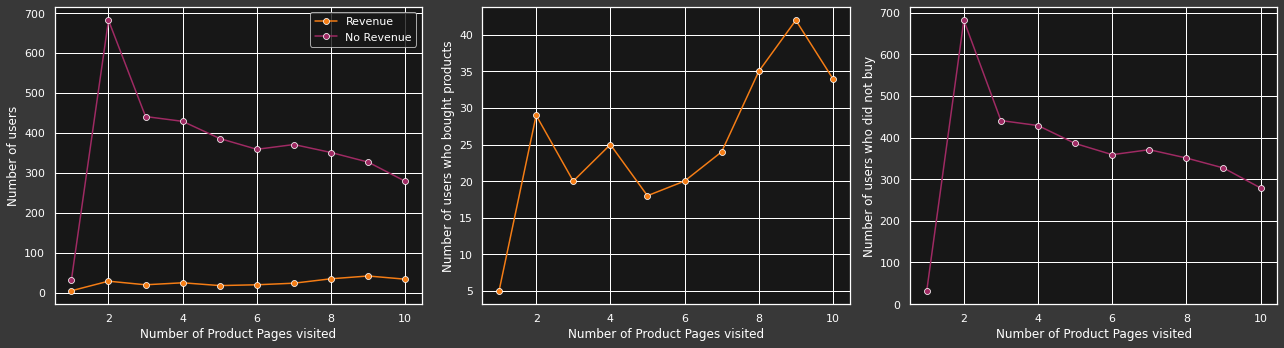

In [ ]:
plot, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.lineplot(ax=axes[0], x=x_true_product, y=y_true_product["Weekend"], color=sns.color_palette("inferno")[4], marker="o")  # Any column instead of Weekend would do.
sns.lineplot(ax=axes[0], x=x_false_product, y=y_false_product["Weekend"], color=sns.color_palette("inferno")[2], marker="o")
sns.lineplot(ax=axes[1], x=x_true_product, y=y_true_product["Weekend"], color=sns.color_palette("inferno")[4], marker="o")
sns.lineplot(ax=axes[2], x=x_false_product, y=y_false_product["Weekend"], color=sns.color_palette("inferno")[2], marker="o")
axes[0].set_xlabel("Number of Product Pages visited")
axes[0].set_ylabel("Number of users")
axes[0].legend(["Revenue", "No Revenue"])
axes[1].set_xlabel("Number of Product Pages visited")
axes[1].set_ylabel("Number of users who bought products")
axes[2].set_xlabel("Number of Product Pages visited")
axes[2].set_ylabel("Number of users who did not buy")
plt.tight_layout();

**INSIGHTS:**

1) We can clearly see an increasing trend for revenue vs number of product pages visited. Still the number of people buying products is significantly lower than people who do not buy. The website should roll out more offers for their customers.

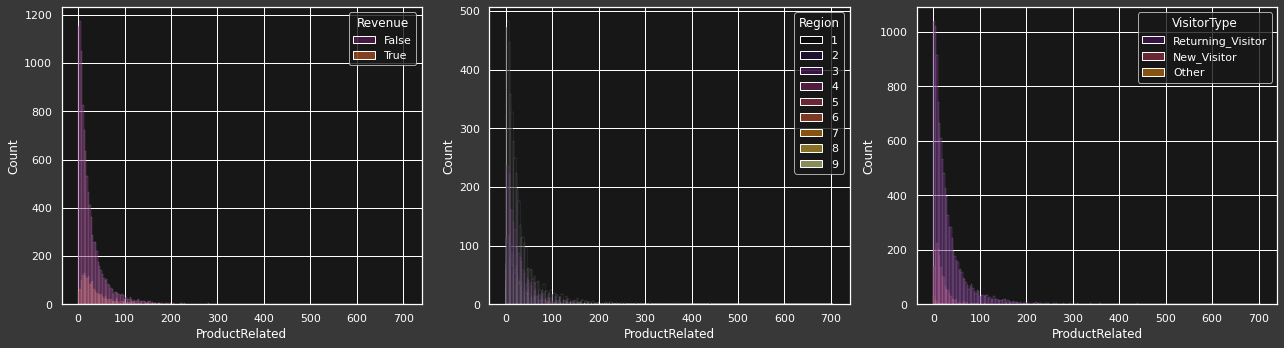

In [ ]:
plot, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(ax=axes[0], data=shop, x="ProductRelated", hue="Revenue", binwidth=3, palette="inferno");
sns.histplot(ax=axes[1], data=shop, x="ProductRelated", hue="Region", binwidth=3, palette="inferno");
sns.histplot(ax=axes[2], data=shop, x="ProductRelated", hue="VisitorType", binwidth=3, palette="inferno");
plt.tight_layout()

**INSIGHTS:**

1) We are able to see that there is a significant number of people who are visiting a lot of product related pages. This implies that the interface of the website is engaging and satisfying. People are window shopping.

2) 	We can also see that people who visit a higher number of product related pages are returning visitors.

3) Combining the above insights we can say that the interface of the website is definitely engaging and some attractive offers could lead to significant rise in revenue.

###Bounce Rates and Exit Rates

In [ ]:
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1.0,1,1,1.0,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2.0,2,1,2.0,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,4.0,1,9,3.0,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3.0,2,2,4.0,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3.0,3,1,4.0,Returning_Visitor,True,False


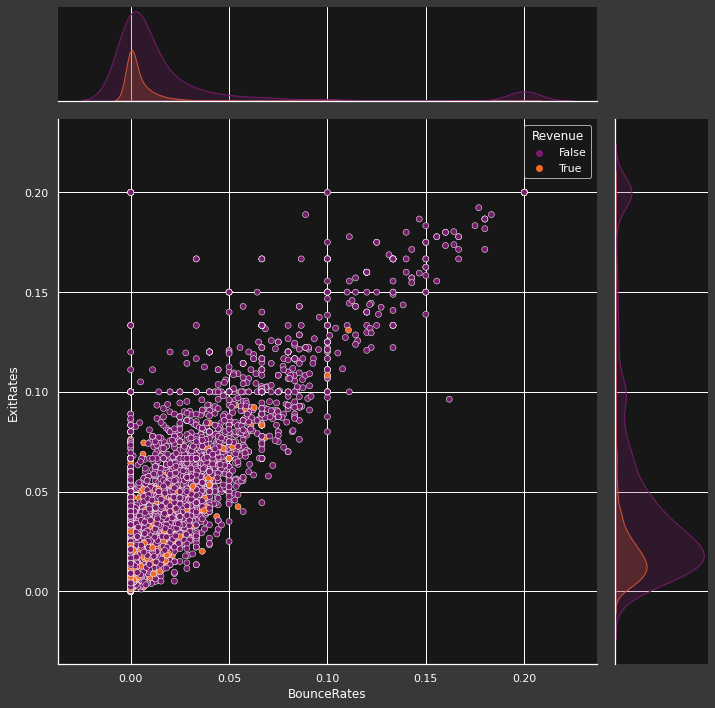

In [ ]:
# Joint plot to understand relation between Bounce Rates and Exit Rates and their Distribution
sns.jointplot(data=shop, x="BounceRates", y="ExitRates", hue="Revenue", height=10, palette="inferno");

**INSIGHTS:**

1) It is intuitively understandable that exit rates and bounce rates are highly correlated.

2) It is also intuitively understandable that users in the lower exit and bounce rate regions make the most purchases.

3) It is refreshing to see that the majority of users belong to the lower bounce and exit rate regions.

In [ ]:
# get the 50th, 80th, 90th and 95th percentile for exit rates and bounce rates
percentile_50_b = shop.BounceRates.quantile(0.5)
percentile_80_b = shop.BounceRates.quantile(0.8)
percentile_90_b = shop.BounceRates.quantile(0.9)
percentile_95_b = shop.BounceRates.quantile(0.95)
percentile_50_e = shop.ExitRates.quantile(0.5)
percentile_80_e = shop.ExitRates.quantile(0.8)
percentile_90_e = shop.ExitRates.quantile(0.9)
percentile_95_e = shop.ExitRates.quantile(0.95)

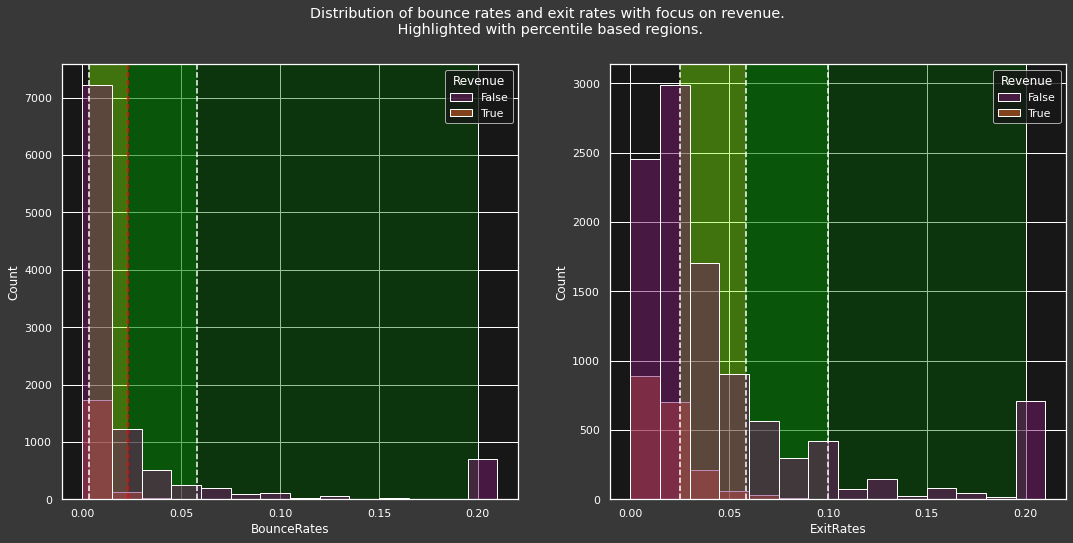

In [ ]:
plot, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].axvspan(percentile_50_b, percentile_80_b, color='chartreuse', alpha=0.4, lw=0);
axes[0].axvspan(percentile_80_b, percentile_90_b, color='green', alpha=0.6, lw=0);
axes[0].axvspan(percentile_90_b, percentile_95_b, color='darkgreen', alpha=0.4, lw=0);

axes[0].axvline(x = percentile_50_b, color = 'white', linestyle="dashed");
axes[0].axvline(x = percentile_80_b, color = 'red', linestyle="dashed");
axes[0].axvline(x = percentile_90_b, color = 'white', linestyle="dashed");


axes[1].axvspan(percentile_50_e, percentile_80_e, color='chartreuse', alpha=0.4, lw=0);
axes[1].axvspan(percentile_80_e, percentile_90_e, color='green', alpha=0.6, lw=0);
axes[1].axvspan(percentile_90_e, percentile_95_e, color='darkgreen', alpha=0.4, lw=0);

axes[1].axvline(x = percentile_50_e, color = 'white', linestyle="dashed");
axes[1].axvline(x = percentile_80_e, color = 'white', linestyle="dashed");
axes[1].axvline(x = percentile_90_e, color = 'white', linestyle="dashed");
sns.histplot(ax=axes[0], data=shop, x="BounceRates", hue="Revenue", palette="inferno", binwidth=0.015);
sns.histplot(ax=axes[1], data=shop, x="ExitRates", hue="Revenue", palette="inferno", binwidth=0.015);
plot.suptitle("Distribution of bounce rates and exit rates with focus on revenue.\n Highlighted with percentile based regions.");

**INSIGHTS:**

1) This graph again reinforces the fact that the distribution of exit rates and bounce rates is right skewed.

2) On further inspection we are able to see that bounce rates are extremely low but exit rates do not fare so well. This means that the landing page of the website is exceptionally good, but this quality is not consistent in other pages.

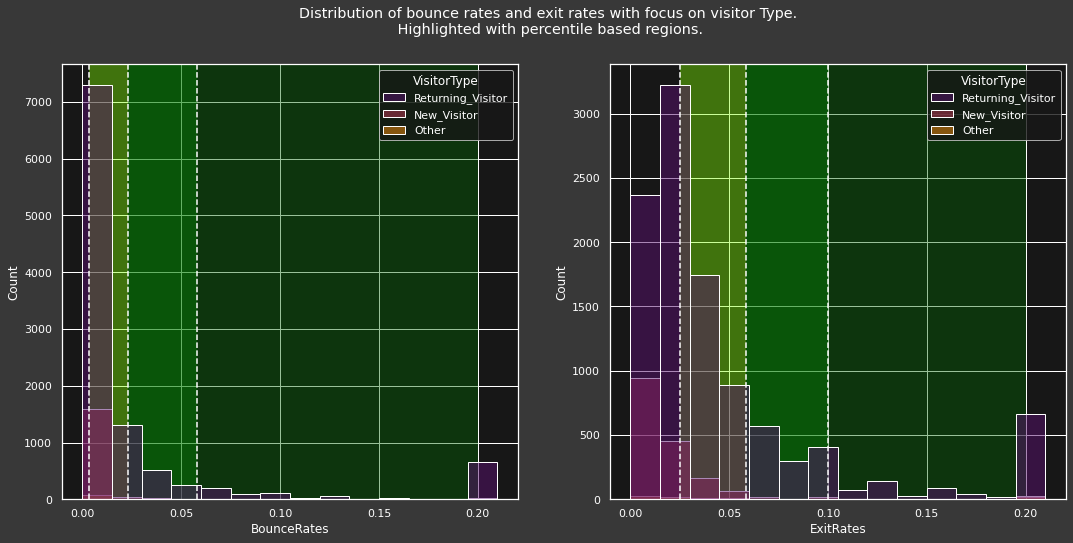

In [ ]:
plot, axes = plt.subplots(1, 2, figsize=(18, 8))
axes[0].axvspan(percentile_50_b, percentile_80_b, color='chartreuse', alpha=0.4, lw=0);
axes[0].axvspan(percentile_80_b, percentile_90_b, color='green', alpha=0.6, lw=0);
axes[0].axvspan(percentile_90_b, percentile_95_b, color='darkgreen', alpha=0.4, lw=0);

axes[0].axvline(x = percentile_50_b, color = 'white', linestyle="dashed");
axes[0].axvline(x = percentile_80_b, color = 'white', linestyle="dashed");
axes[0].axvline(x = percentile_90_b, color = 'white', linestyle="dashed");


axes[1].axvspan(percentile_50_e, percentile_80_e, color='chartreuse', alpha=0.4, lw=0);
axes[1].axvspan(percentile_80_e, percentile_90_e, color='green', alpha=0.6, lw=0);
axes[1].axvspan(percentile_90_e, percentile_95_e, color='darkgreen', alpha=0.4, lw=0);

axes[1].axvline(x = percentile_50_e, color = 'white', linestyle="dashed");
axes[1].axvline(x = percentile_80_e, color = 'white', linestyle="dashed");
axes[1].axvline(x = percentile_90_e, color = 'white', linestyle="dashed");
sns.histplot(ax=axes[0], data=shop, x="BounceRates", hue="VisitorType", palette="inferno", binwidth=0.015);
sns.histplot(ax=axes[1], data=shop, x="ExitRates", hue="VisitorType", palette="inferno", binwidth=0.015);
plot.suptitle("Distribution of bounce rates and exit rates with focus on visitor Type.\n Highlighted with percentile based regions.");

**INSIGHTS:**

1) Returning and new visitors show a similar bounce rate which means that be it a new customer or a returning one the website remains engaging.

2) The exit rates are not so optmistic. The website should work towards better exit rates.

<ipython-input-68-cd8447a7215b>:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  shop_grouped = shop.groupby("Month").quantile(.8)["BounceRates"].reset_index();
<ipython-input-68-cd8447a7215b>:18: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  shop_grouped = shop.groupby("Month").quantile(0.8)["ExitRates"].reset_index();


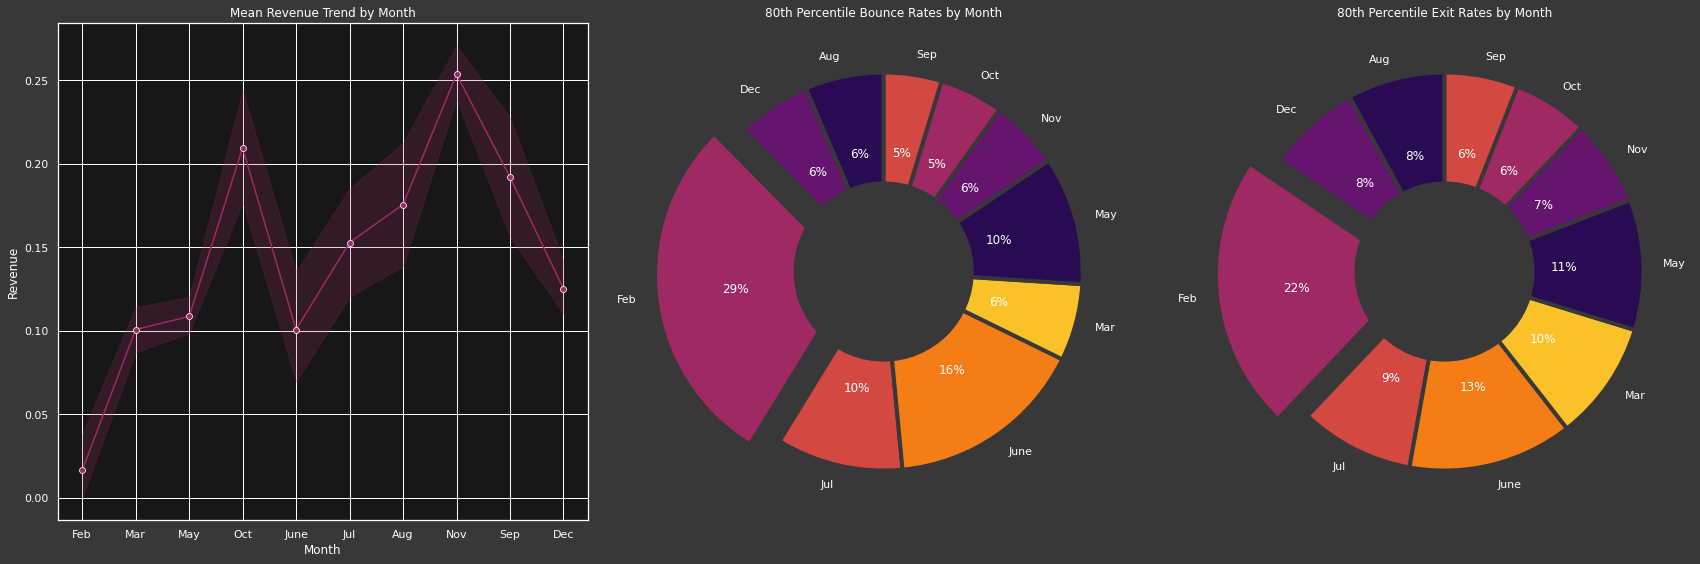

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

sns.lineplot(ax=axes[0], data=shop, x="Month", y="Revenue", marker="o", color=sns.color_palette("inferno")[2]);

shop_grouped = shop.groupby("Month").quantile(.8)["BounceRates"].reset_index();
explode = shop_grouped["BounceRates"] == np.max(shop_grouped["BounceRates"])  # I get a boolean array here
explode = explode.astype(np.int64) * 0.15  # Convert that boolean array to integer array
axes[1].pie(
    shop_grouped["BounceRates"] / shop_grouped["BounceRates"].sum(),
    labels=shop_grouped["Month"],
    colors=sns.color_palette("inferno")[:shop_grouped.shape[0]],
    wedgeprops = {'linewidth': 4, 'edgecolor': '#383838'},
    autopct='%1.0f%%',
    startangle=90,
    explode=explode,
);

shop_grouped = shop.groupby("Month").quantile(0.8)["ExitRates"].reset_index();
explode = shop_grouped["ExitRates"] == np.max(shop_grouped["ExitRates"])  # I get a boolean array here
explode = explode.astype(np.int64) * 0.15  # Convert that boolean array to integer array
axes[2].pie(
    shop_grouped["ExitRates"] / shop_grouped["ExitRates"].sum(),
    labels=shop_grouped["Month"],
    colors=sns.color_palette("inferno")[:shop_grouped.shape[0]],
    wedgeprops = {'linewidth': 4, 'edgecolor': '#383838'},
    autopct='%1.0f%%',
    startangle=90,
    explode=explode,
);

axes[0].set_title("Mean Revenue Trend by Month")
centre_circle = plt.Circle((0, 0), 0.45, fc='#383838', edgecolor="#383838")
axes[1].add_artist(centre_circle);
axes[1].set_title("80th Percentile Bounce Rates by Month");
centre_circle = plt.Circle((0, 0), 0.45, fc='#383838', edgecolor="#383838")
axes[2].add_artist(centre_circle)
axes[2].set_title("80th Percentile Exit Rates by Month");
plt.tight_layout();


**INSIGHTS:**

1) Gathering Insights from previous graphs, we understand that at the 80th percentile bounce rate and exit rate, user engagement reaches a point of inflexion. The users are just not so sure about the website at this point. These are our potential customers. With targeted offers, we can convert them to loyal and paying customers.

2) We see that Bounce rates and exit rates are significantly higher in february compared to other months. The website can leverage valentines week which falls in february and launch an extensive marketing campaign to gather new users.

3) We see that engagement rates go up as we near black friday and christmas, which means that this website is popular among the customers. However, in June the enagagement seems to be low due to the absence of any special days. The website should launch a campaign in June aimed at its existing loyal customers.

#Cumulative Insights

1) Overall, the website's landing page's user interface is fantastic and keeps the majority of visitors interested, however other pages might use some enhancement. In order to reduce the exit rate.

2) The business has great a SEO, but with improved marketing, seasonal and weekend deals, sales might increase significantly.

3) The company operates in a fairly small area, thus expanding its distribution locations and involving customers from other regions will surely increase its revenue.

4)We notice that recurring users visit informational sites quite frequently, which could indicate that they are dissatisfied.

5) The website should prioritise bringing in more visitors as it has the potential to engage any user.


#Predictive Analysis

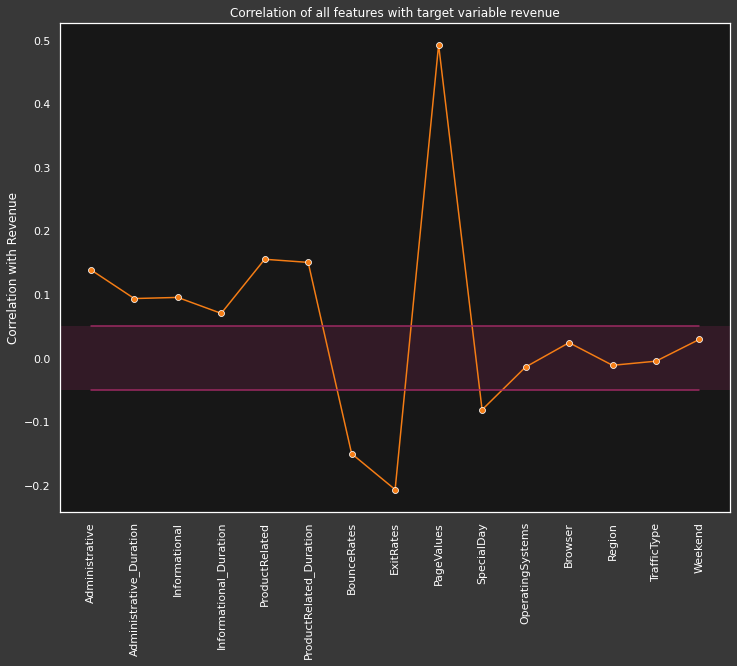

In [ ]:
# Plot correlation of all numeric columns with the revenue column.
sns.lineplot(x=shop_numeric_columns[:-1], y=shop.corr()["Revenue"].iloc[:-1], marker="o", color=sns.color_palette("inferno")[4])
sns.lineplot(x=shop_numeric_columns[:-1], y=[0.05] * 15, color=sns.color_palette("inferno")[2])
sns.lineplot(x=shop_numeric_columns[:-1], y=[-0.05] * 15, color=sns.color_palette("inferno")[2])
plt.axhspan(-0.05, 0.05, color=sns.color_palette("inferno")[2], alpha=0.2, lw=0)
plt.grid(False)
plt.xticks(rotation=90);
plt.ylabel("Correlation with Revenue");
plt.title("Correlation of all features with target variable revenue");

In [ ]:
# Drop the columns which had little correlation with the target variable.
shop_predict = shop.drop(columns=[
    'OperatingSystems',
    'Browser',
    'Region',
    'TrafficType',
    'Weekend'
])

In [ ]:
shop_predict.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,Returning_Visitor,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,Returning_Visitor,False
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,Returning_Visitor,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,Returning_Visitor,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,Returning_Visitor,False


## Encoding Categorical Variables

In [ ]:
# Manual Encoding
shop_predict.replace({"VisitorType": {'Returning_Visitor': 0, 'New_Visitor': 1, 'Other': 2}}, inplace=True)
shop_predict.replace({"Revenue": {True: 1, False: 0}}, inplace=True)

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
shop_predict['Month'] = label_encoder.fit_transform(shop_predict['Month'])

In [ ]:
shop_predict.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,VisitorType,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,0,0


In [ ]:
shop_predict.shape

(12330, 13)

In [ ]:
shop_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  float64
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  float64
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  VisitorType              12330 non-null  int64  
 12  Revenue                  12330 non-null  int64  
dtypes: float64(10), int64(3)
memory usage: 1.2 MB


## Prepare Data for ML Algorithm

In [ ]:
# Separate features from target variable.
X, y = shop_predict.iloc[:, :-1], shop_predict.iloc[:, -1]

In [ ]:
X.shape

(12330, 12)

In [ ]:
y.shape

(12330,)

In [ ]:
# Split Dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

## Classification

### SVM

In [ ]:
svm_classifier = SVC(kernel='rbf')

In [ ]:
svm_classifier.fit(X_train, y_train)

SVC()

In [ ]:
# Training Accuracy
X_train_predict = svm_classifier.predict(X_train)
accuracy_score(X_train_predict, y_train)

0.8488442822384428

In [ ]:
# Testing Accuracy
X_test_predict = svm_classifier.predict(X_test)
accuracy_score(X_test_predict, y_test)

0.8467153284671532

### Decision Tree

In [ ]:
dt_classifier = DecisionTreeClassifier()

In [ ]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Training Accuracy
X_train_predict = dt_classifier.predict(X_train)
accuracy_score(X_train_predict, y_train)

0.9997972424979724

In [ ]:
# Testing Accuracy
X_test_predict = dt_classifier.predict(X_test)
accuracy_score(X_test_predict, y_test)

0.8503649635036497

### Random Forest Classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=20, max_leaf_nodes=16, n_jobs=-1)

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=20, n_jobs=-1)

In [ ]:
# Training Accuracy
X_train_predict = rf_classifier.predict(X_train)
accuracy_score(X_train_predict, y_train)

0.9019667477696675

In [ ]:
# Testing Accuracy
X_test_predict = dt_classifier.predict(X_test)
accuracy_score(X_test_predict, y_test)

0.8503649635036497